In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
from numpy import std

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Params
DATA_PATH = '../data/sample.xls'

#### Problem Description

Create a report detailing some of the anomalies identified and potential attention points, for a north-america industry purchase data (orders), person profiles (people), and return transactions (returns).

### EDA

In [4]:
def read_dataframe(sheet_name, data_path=DATA_PATH, dtype=None):
    if dtype:
        return pd.read_excel(data_path, sheet_name=sheet_name, dtype=dtype)
    return pd.read_excel(data_path, sheet_name=sheet_name)

orders = read_dataframe('Orders')
returns = read_dataframe('Returns')
people = read_dataframe('People')


##### Returns

In [5]:
returns.head(3)

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345


In [6]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  296 non-null    object
 1   Order ID  296 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [7]:
returns.Returned.value_counts()

Returned
Yes    296
Name: count, dtype: int64

<span style="color: #e789a1;"> insights: </span>
- Returned column only contains YES values.

<span style="color: #4287f5;"> hypothesis: </span>
- Did all the products returned successfully or there is a problem here?

In [8]:
returns['Order ID'].value_counts().max()

1

<span style="color: #4287f5;"> hypothesis: </span>
- Is there a duplicated Order ID on Returned table? Maybe a corrupted Order ID

<span style="color: #e789a1;"> insights: </span>
- All the Order IDs are unique



In [9]:
returns.iloc[returns['Order ID'].isin(orders['Order ID']).index]

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999
...,...,...
291,Yes,CA-2015-101910
292,Yes,CA-2017-156958
293,Yes,CA-2016-105585
294,Yes,CA-2016-148796


<span style="color: #4287f5;"> hypothesis: </span>
- All the Order IDs on the Returned table are linked with the Orders table?

<span style="color: #e789a1;"> insights: </span>
- 296 rows were returned (same as table total). All the Order IDs are present on the Orders table

##### People

In [10]:
people.head(3)

,Person,Region
0,Anna Andreadi,West
1,Chuck Magee,East
2,Kelly Williams,Central


In [11]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Person  4 non-null      object
 1   Region  4 non-null      object
dtypes: object(2)
memory usage: 196.0+ bytes


In [12]:
people.Person.value_counts()

Person
Anna Andreadi        1
Chuck Magee          1
Kelly Williams       1
Cassandra Brandow    1
Name: count, dtype: int64

In [13]:
people.Region.value_counts()

Region
West       1
East       1
Central    1
South      1
Name: count, dtype: int64

##### Orders

In [14]:
orders.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [16]:
orders.describe().T

,count,mean,min,25%,50%,75%,max,std
Row ID,9994.0,4997.5,1.0,2499.25,4997.5,7495.75,9994.0,2885.163629
Order Date,9994,2016-04-30 00:07:12.259355648,2014-01-03 00:00:00,2015-05-23 00:00:00,2016-06-26 00:00:00,2017-05-14 00:00:00,2017-12-30 00:00:00,NaN
Ship Date,9994,2016-05-03 23:06:58.571142912,2014-01-07 00:00:00,2015-05-27 00:00:00,2016-06-29 00:00:00,2017-05-18 00:00:00,2018-01-05 00:00:00,NaN
Postal Code,9994.0,55190.379428,1040.0,23223.0,56430.5,90008.0,99301.0,32063.69335
Sales,9994.0,229.858001,0.444,17.28,54.49,209.94,22638.48,623.245101
Quantity,9994.0,3.789574,1.0,2.0,3.0,5.0,14.0,2.22511
Discount,9994.0,0.156203,0.0,0.0,0.2,0.2,0.8,0.206452
Profit,9994.0,28.656896,-6599.978,1.72875,8.6665,29.364,8399.976,234.260108


<span style="color: #e789a1;"> insights: </span>
- The latest order date is before the latest ship date, as expected
- Sales has a huge standard deviation, maybe a presence of outliers, looking at the max value and the third quarter
- Profit has also a huge stardard deviation, maybe a presence of outliers

In [17]:
orders.Segment.value_counts()

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

In [18]:
orders.Country.value_counts()

Country
United States    9994
Name: count, dtype: int64

<span style="color: #e789a1;"> insights: </span>
- They only sell in the US

In [19]:
orders.State.value_counts().nlargest(5)

State
California      2001
New York        1128
Texas            985
Pennsylvania     587
Washington       506
Name: count, dtype: int64

In [20]:
orders.Region.value_counts()

Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

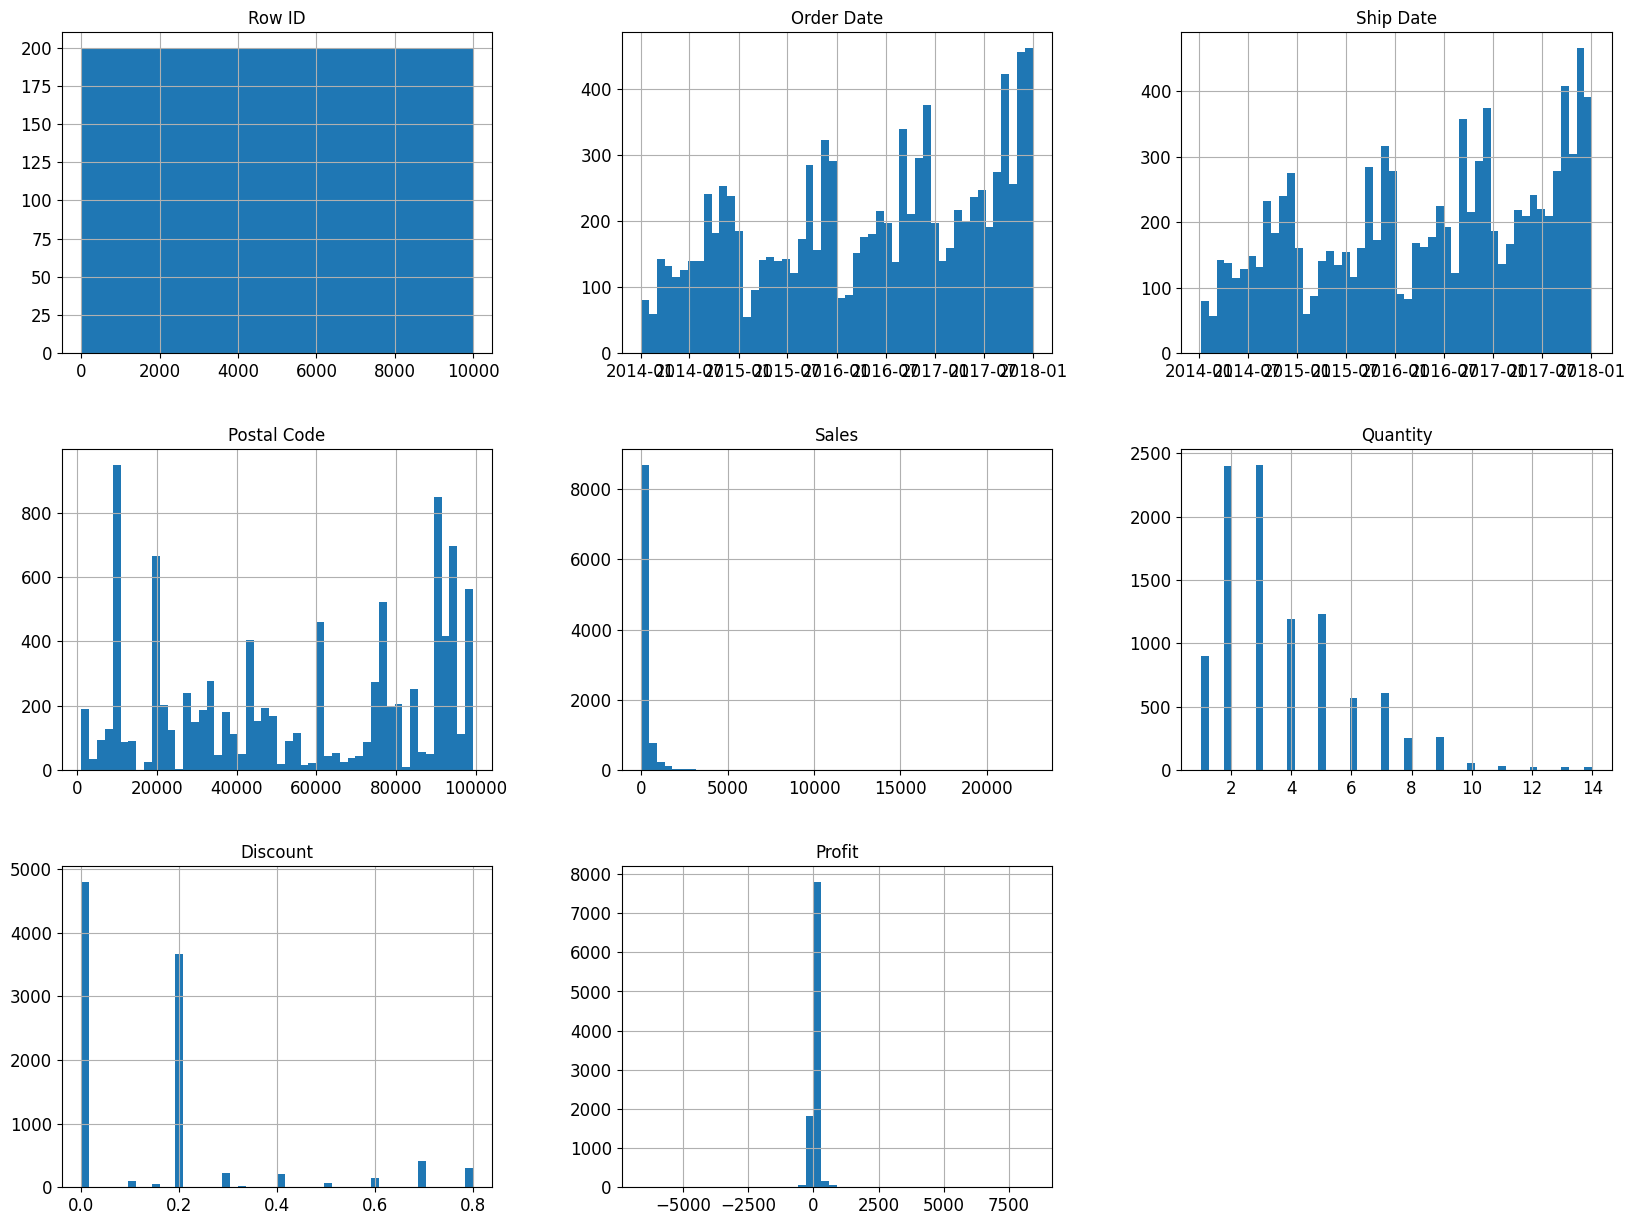

In [21]:
%matplotlib inline
orders.hist(bins=50, figsize=(20, 15))
plt.show()

In [22]:
orders['Order ID'].value_counts().nlargest(10)

Order ID
CA-2017-100111    14
CA-2017-157987    12
CA-2016-165330    11
US-2016-108504    11
CA-2015-131338    10
CA-2016-105732    10
US-2015-126977    10
US-2016-114013     9
CA-2014-106439     9
CA-2016-145177     9
Name: count, dtype: int64

In [23]:
orders[orders['Order ID'] == 'CA-2017-100111']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
6090,6091,CA-2017-100111,2017-09-20,2017-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,...,10035,East,FUR-CH-10003846,Furniture,Chairs,Hon Valutask Swivel Chairs,272.646,3,0.1,18.1764
6091,6092,CA-2017-100111,2017-09-20,2017-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,...,10035,East,TEC-AC-10002647,Technology,Accessories,Logitech Wireless Boombox Speaker - portable -...,212.800,2,0.0,95.7600
6092,6093,CA-2017-100111,2017-09-20,2017-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,...,10035,East,OFF-PA-10000807,Office Supplies,Paper,"TOPS ""Important Message"" Pads, Canary, 4-1/4 x...",38.520,9,0.0,18.1044
6093,6094,CA-2017-100111,2017-09-20,2017-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,...,10035,East,TEC-AC-10001465,Technology,Accessories,SanDisk Cruzer 64 GB USB Flash Drive,72.640,2,0.0,21.7920
6094,6095,CA-2017-100111,2017-09-20,2017-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,...,10035,East,OFF-ST-10000615,Office Supplies,Storage,"SimpliFile Personal File, Black Granite, 15w x...",45.400,4,0.0,12.7120
6095,6096,CA-2017-100111,2017-09-20,2017-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,...,10035,East,OFF-PA-10002713,Office Supplies,Paper,"Adams Phone Message Book, 200 Message Capacity...",13.760,2,0.0,6.3296
6096,6097,CA-2017-100111,2017-09-20,2017-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,...,10035,East,FUR-CH-10003061,Furniture,Chairs,"Global Leather Task Chair, Black",80.991,1,0.1,8.0991
6097,6098,CA-2017-100111,2017-09-20,2017-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,...,10035,East,OFF-BI-10000343,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",11.784,3,0.2,3.9771
6098,6099,CA-2017-100111,2017-09-20,2017-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,...,10035,East,OFF-FA-10000304,Office Supplies,Fasteners,Advantus Push Pins,4.360,2,0.0,1.7876
6099,6100,CA-2017-100111,2017-09-20,2017-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,...,10035,East,FUR-CH-10004086,Furniture,Chairs,Hon 4070 Series Pagoda Armless Upholstered Sta...,2888.127,11,0.1,609.7157


<span style="color: #4287f5;"> hypothesis: </span>
- Has any duplicated Order ID?

<span style="color: #e789a1;"> insights: </span>
- Order ID can be repeated with different items of the same order

In [24]:
orders.groupby('Order ID')['Customer ID'].nunique().sort_values(ascending=False)

Order ID
CA-2014-100006    1
CA-2017-126662    1
CA-2017-126928    1
CA-2017-126914    1
CA-2017-126865    1
                 ..
CA-2015-167269    1
CA-2015-167255    1
CA-2015-167010    1
CA-2015-166975    1
US-2017-169551    1
Name: Customer ID, Length: 5009, dtype: int64

<span style="color: #4287f5;"> hypothesis: </span>
- Is thera a Order ID with different Customer IDs?

<span style="color: #e789a1;"> insights: </span>
- The Orders and Clients are N:1 relationship as expected

In [25]:
def print_relationship_cardinality_with_groupby(df, groupby_column, relationship_columns_list):
    result_list = []
    if not relationship_columns_list or not groupby_column:
        return
    for column in relationship_columns_list:
        result = {
            'Column': column,
            'Cardinality': df.groupby(groupby_column)[column].nunique().sort_values(ascending=False).max()
        }
        result_list.append(result)

    for result in result_list:
        print(result)

In [26]:
order_id_relationship_column_list = [
    'Order Date', 'Ship Date', 'Ship Mode',
    'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
    'Postal Code', 'Region'
]

print_relationship_cardinality_with_groupby(orders, 'Order ID', order_id_relationship_column_list)

{'Column': 'Order Date', 'Cardinality': 1}
{'Column': 'Ship Date', 'Cardinality': 1}
{'Column': 'Ship Mode', 'Cardinality': 1}
{'Column': 'Customer ID', 'Cardinality': 1}
{'Column': 'Customer Name', 'Cardinality': 1}
{'Column': 'Segment', 'Cardinality': 1}
{'Column': 'Country', 'Cardinality': 1}
{'Column': 'City', 'Cardinality': 1}
{'Column': 'State', 'Cardinality': 1}
{'Column': 'Postal Code', 'Cardinality': 1}
{'Column': 'Region', 'Cardinality': 1}


<span style="color: #4287f5;"> hypothesis: </span>
- After checking the Client ID cardinality, I realized that I could check if there is any cardinality problem for other columns as well.

<span style="color: #e789a1;"> insights: </span>
- There is no problem

In [27]:
lower_ship_than_order = orders['Order Date'] > orders['Ship Date']
lower_ship_than_order.value_counts()

False    9994
Name: count, dtype: int64

<span style="color: #4287f5;"> hypothesis: </span>
- Is there any inconsistence between the order date and shipping date?

<span style="color: #e789a1;"> insights: </span>
- There is no order date with a higher value than the ship date

In [28]:
customer_id_relationship_column_list = [
    'Customer Name', 'Country', 'City', 'State',
    'Postal Code', 'Region', 'Segment'
]

print_relationship_cardinality_with_groupby(orders, 'Customer ID', customer_id_relationship_column_list)

{'Column': 'Customer Name', 'Cardinality': 1}
{'Column': 'Country', 'Cardinality': 1}
{'Column': 'City', 'Cardinality': 15}
{'Column': 'State', 'Cardinality': 11}
{'Column': 'Postal Code', 'Cardinality': 17}
{'Column': 'Region', 'Cardinality': 4}
{'Column': 'Segment', 'Cardinality': 1}


<span style="color: #4287f5;"> hypothesis: </span>
- Is there any inconsistence the Customer ID cardinality?

<span style="color: #e789a1;"> insights: </span>
- All the clientd id are correct linked with one client name, but they can change their addresses, but seems that there is no problem with that.

In [29]:
product_id_relationship_column_list = [
    'Category', 'Sub-Category','Product Name'
]

print_relationship_cardinality_with_groupby(orders, 'Product ID', product_id_relationship_column_list)

{'Column': 'Category', 'Cardinality': 1}
{'Column': 'Sub-Category', 'Cardinality': 1}
{'Column': 'Product Name', 'Cardinality': 2}


In [30]:
orders.groupby('Product ID')['Product Name'].nunique().sort_values(ascending=False)

Product ID
TEC-PH-10001795    2
OFF-BI-10002026    2
OFF-PA-10003022    2
OFF-AR-10001149    2
OFF-PA-10001970    2
                  ..
OFF-AR-10004602    1
OFF-AR-10004587    1
OFF-AR-10004582    1
OFF-AR-10004511    1
TEC-PH-10004977    1
Name: Product Name, Length: 1862, dtype: int64

In [31]:
product_id_columns_subset = ['Product ID', 'Category', 'Sub-Category',
    'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']

def get_inconsistent_rows(groupby_column, inconsistent_column, df=orders):
    filtered = df.groupby(groupby_column).filter(lambda x: x[inconsistent_column].nunique() > 1)
    result = filtered.drop_duplicates(subset=[groupby_column, inconsistent_column]).sort_values(groupby_column)
    return result

inconsistent_products = get_inconsistent_rows('Product ID', 'Product Name')
inconsistent_products[product_id_columns_subset]

,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2471,FUR-BO-10002213,Furniture,Bookcases,"Sauder Forest Hills Library, Woodland Oak Finish",451.136,4,0.20,-67.6704
2115,FUR-BO-10002213,Furniture,Bookcases,DMI Eclipse Executive Suite Bookcases,425.833,1,0.15,20.0392
66,FUR-CH-10001146,Furniture,Chairs,"Global Value Mid-Back Manager's Chair, Gray",213.115,5,0.30,-15.2225
128,FUR-CH-10001146,Furniture,Chairs,"Global Task Chair, Black",81.424,2,0.20,-9.1602
1459,FUR-FU-10001473,Furniture,Furnishings,DAX Wood Document Frame,27.460,2,0.00,9.8856
...,...,...,...,...,...,...,...,...
1219,TEC-PH-10002200,Technology,Phones,Samsung Galaxy Note 2,1931.958,7,0.40,-386.3916
2596,TEC-PH-10002310,Technology,Phones,Plantronics Calisto P620-M USB Wireless Speake...,587.970,3,0.00,158.7519
1378,TEC-PH-10002310,Technology,Phones,Panasonic KX T7731-B Digital phone,399.960,5,0.20,34.9965
922,TEC-PH-10004531,Technology,Phones,OtterBox Commuter Series Case - iPhone 5 & 5s,21.990,1,0.00,10.5552


<span style="color: #4287f5;"> hypothesis: </span>
- Is there any inconsistence the Product ID cardinality?

<span style="color: #e789a1;"> insights: </span>
- There is a different name for the same Product ID, with different prices and profits.

<Axes: >

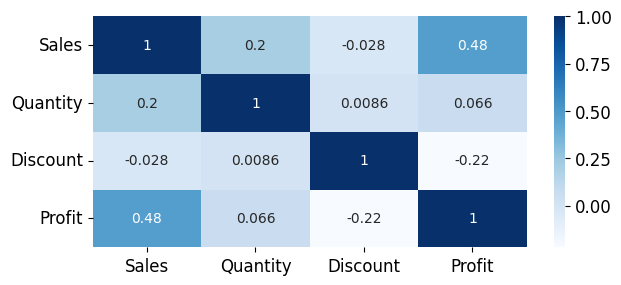

In [32]:
plt.figure(figsize=(7,3))

corr = orders[['Sales', 'Quantity', 'Discount', 'Profit']].corr()
# plotando o heatmap
sns.heatmap(corr, annot=True, cmap='Blues',
        xticklabels=corr.columns,
        yticklabels=corr.columns)

<span style="color: #e789a1;"> insights: </span>
- Usually the discount is applied with a higher quantity, but we can see that correlation between them is very weak. Is the discount being applied correctly?
- Higher sales amount is correlated with a higher profit

<Axes: >

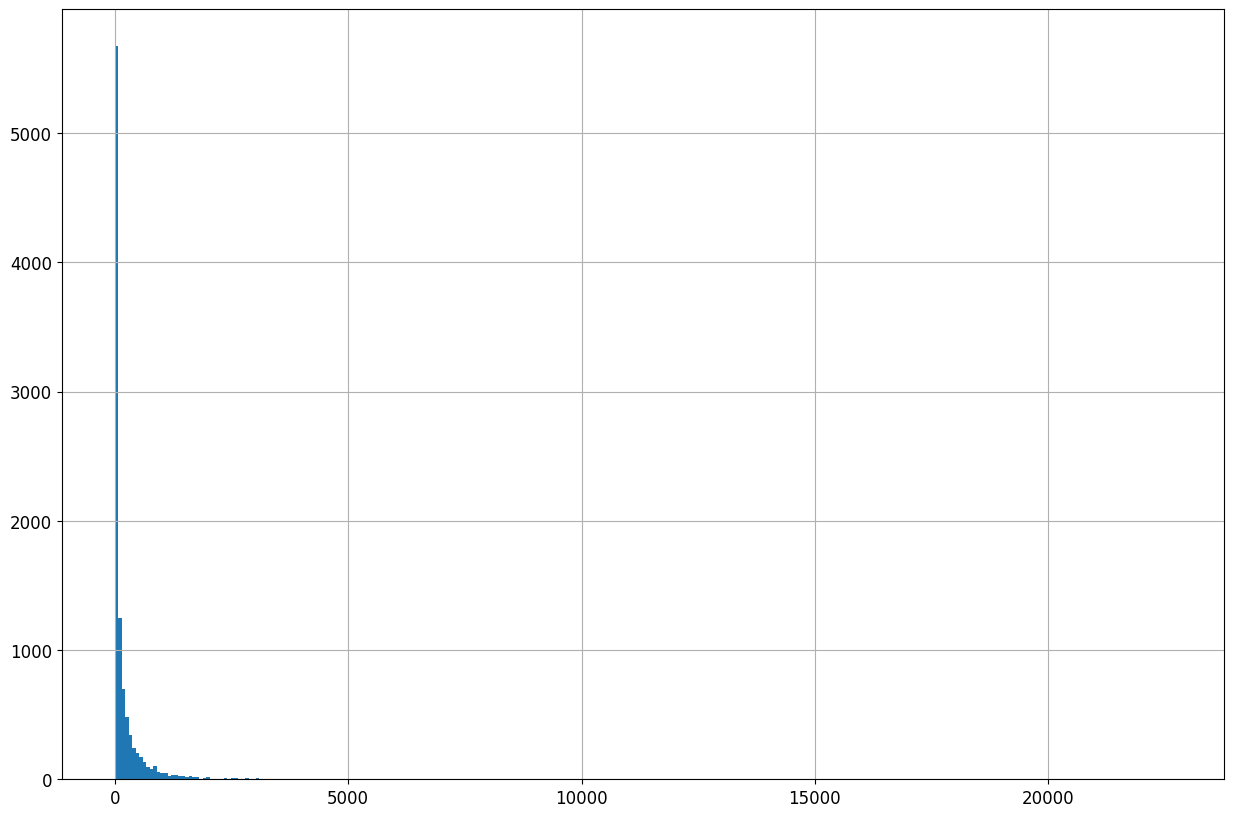

In [33]:
orders.Sales.hist(bins=300, figsize=(15, 10))

In [34]:
def outliers_std_method(df, column):
    series = df[column]
    data_mean, data_std = mean(series), std(series)
    print('mean=%.3f stdv=%.3f' % (data_mean, data_std))
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    df_without_outliers = df[(df[column] > lower) & (df[column] < upper)].copy()
    print(F'Identified outliers: {len(df) - len(df_without_outliers)}')
    print(F'Non-outlier observations: {len(df_without_outliers)}')

outliers_std_method(orders, 'Sales')

mean=229.858 stdv=623.214
Identified outliers: 127
Non-outlier observations: 9867


In [35]:
def print_rows_above_threshold(column, thrshld, df=orders):
    print(F'# {column} above ${thrshld}: ', len(df[column][df[column] > thrshld]))
    return df[column][df[column] > thrshld]

print_rows_above_threshold('Sales', 5000)

# Sales above $5000:  19


165      8159.952
509      6354.950
683      7999.980
2505     8187.650
2623    11199.968
2697    22638.480
4098     9449.950
4190    10499.970
4277     9099.930
6340     5199.960
6425     8399.976
6520     5443.960
6626     6999.960
6826    17499.950
7666     5399.910
8153    13999.960
8488     8749.950
8858     5083.960
9039     9892.740
Name: Sales, dtype: float64

In [36]:
print_rows_above_threshold('Sales', 10000)
orders[orders.Sales > 10000]

# Sales above $10000:  5


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2623,2624,CA-2017-127180,2017-10-22,2017-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,...,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
2697,2698,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,32216,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784
4190,4191,CA-2017-166709,2017-11-17,2017-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,...,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856
6826,6827,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760
8153,8154,CA-2017-140151,2017-03-23,2017-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,...,98115,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808


In [37]:
orders['Unity Price'] = orders['Sales'] / orders['Quantity']
orders['Unity Price Discount Ignored'] = orders['Sales'] * (1 + orders['Discount']) / orders['Quantity']

In [38]:
orders[orders['Product ID'] == 'TEC-MA-10002412']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Unity Price,Unity Price Discount Ignored
2697,2698,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.48,6,0.5,-1811.0784,3773.08,5659.62


In [39]:
overpriced_product_ids = list(orders.iloc[orders.Sales[orders.Sales > 10000].index]['Product ID'].unique())
orders[orders['Product ID'].isin(overpriced_product_ids)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Unity Price,Unity Price Discount Ignored
2623,2624,CA-2017-127180,2017-10-22,2017-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888,2799.992,3359.9904
2697,2698,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784,3773.080,5659.6200
4190,4191,CA-2017-166709,2017-11-17,2017-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856,3499.990,3499.9900
6425,6426,CA-2016-143714,2016-05-23,2016-05-27,Standard Class,CC-12370,Christopher Conant,Consumer,United States,Philadelphia,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,8399.976,4,0.4,1119.9968,2099.994,2939.9916
6826,6827,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760,3499.990,3499.9900
8153,8154,CA-2017-140151,2017-03-23,2017-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808,3499.990,3499.9900


<span style="color: #4287f5;"> hypothesis: </span>
- There are products with a high value being sold and low profit, contradicting the correlation, there is any error?

<span style="color: #e789a1;"> insights: </span>
- The products must have been sold with different prices to different customers, or there is an error on the unit price.

In [40]:
orders.Discount.value_counts()

Discount
0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: count, dtype: int64

<Axes: >

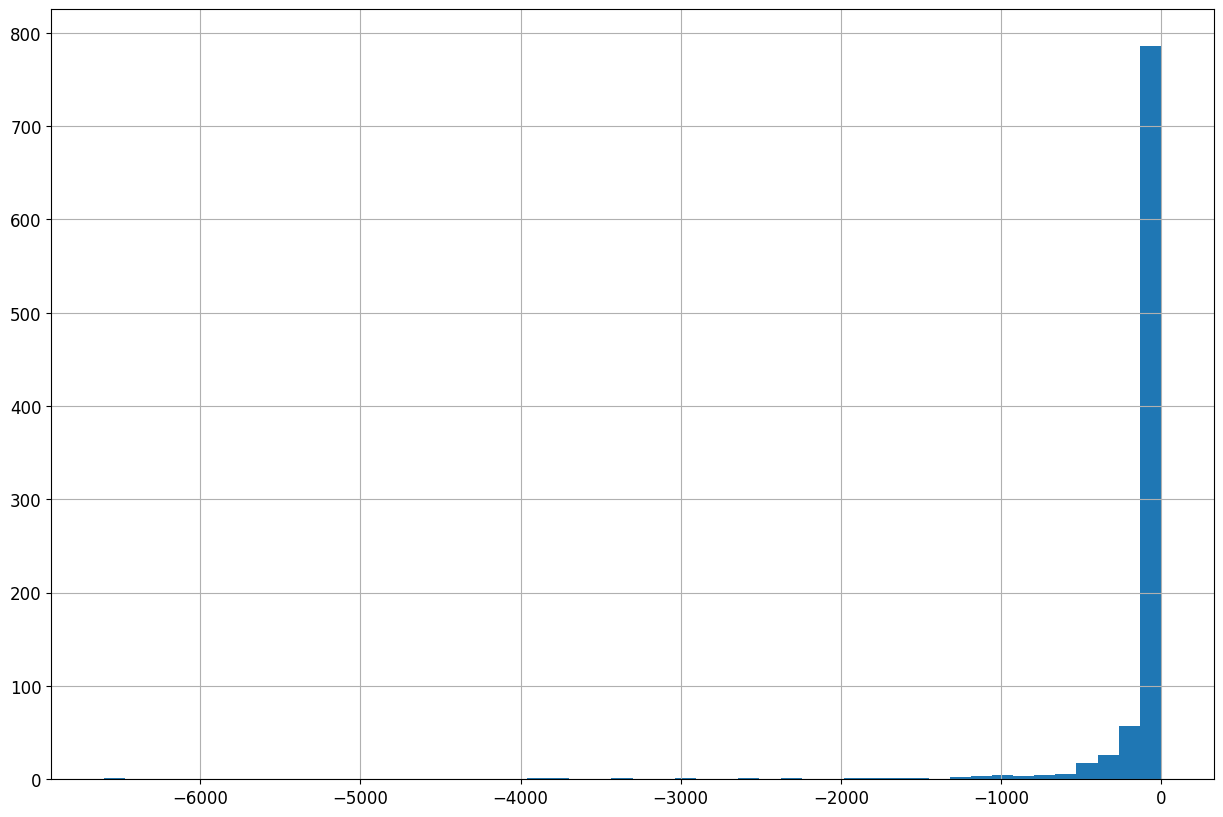

In [41]:
orders[orders.Discount >= 0.5].Profit.hist(bins=50, figsize=(15, 10))

<span style="color: #4287f5;"> hypothesis: </span>
- High values of discount are profitable? Why they are applied?

<span style="color: #e789a1;"> insights: </span>
- High values of discount with negative profit in all the cases, is that alligned with the business?

In [42]:
higher_profit_than_sales = orders['Profit'] > orders['Sales']
higher_profit_than_sales.value_counts()

False    9994
Name: count, dtype: int64

<span style="color: #4287f5;"> hypothesis: </span>
- Is there any inconsistence between the profit and Sales?

<span style="color: #e789a1;"> insights: </span>
- There is no order profit higher than order sales.

<Axes: >

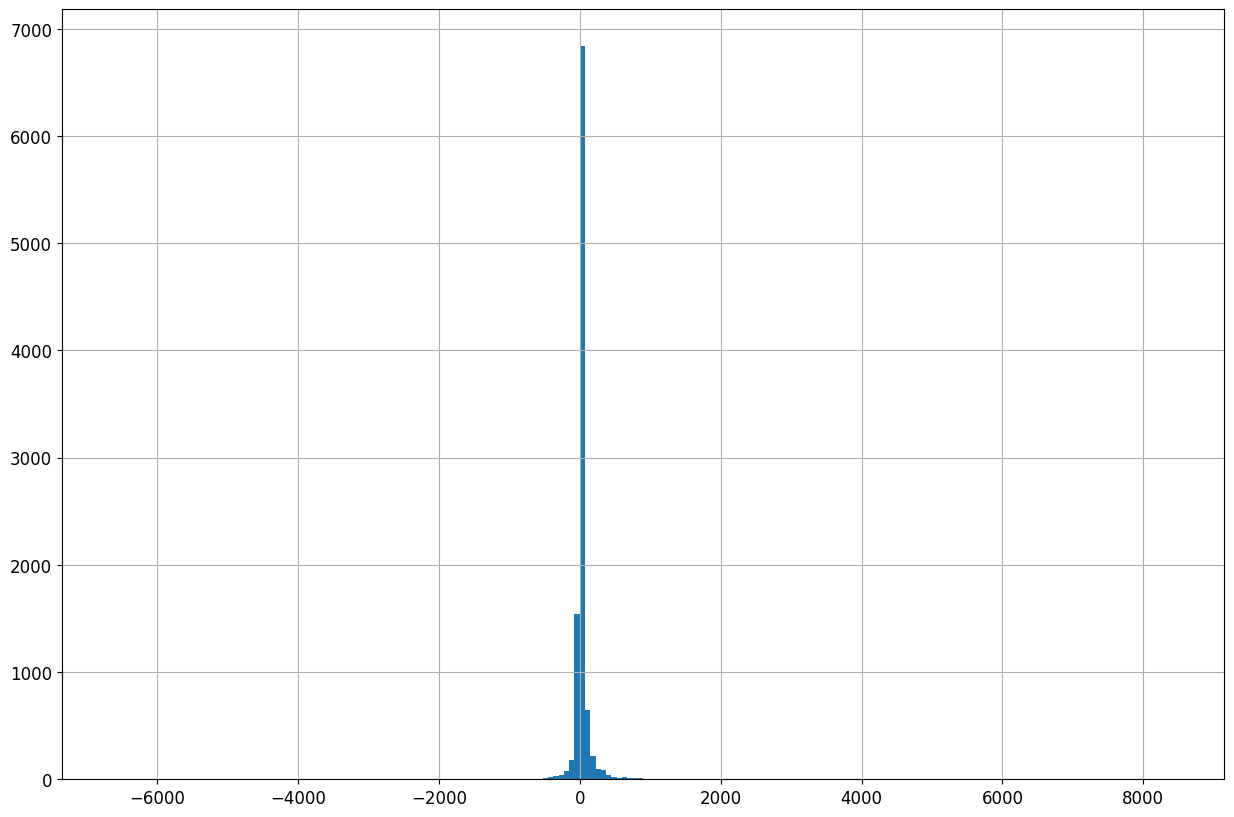

In [43]:
orders.Profit.hist(bins=200, figsize=(15, 10))

In [44]:
print_rows_above_threshold('Profit', 2000)

# Profit above $2000:  15


509     3177.4750
1085    2400.9657
2623    3919.9888
4098    4630.4755
4190    5039.9856
4277    2365.9818
6520    2504.2216
6626    2239.9872
6826    8399.9760
7666    2591.9568
8153    6719.9808
8204    2229.0240
8488    2799.9840
8990    2302.9671
9039    4946.3700
Name: Profit, dtype: float64

In [45]:
overprofited_product_ids = list(orders.iloc[orders.Profit[orders.Profit > 5000].index]['Product ID'].unique())
orders[orders['Product ID'].isin(overprofited_product_ids)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Unity Price,Unity Price Discount Ignored
2623,2624,CA-2017-127180,2017-10-22,2017-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888,2799.992,3359.9904
4190,4191,CA-2017-166709,2017-11-17,2017-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856,3499.990,3499.9900
6425,6426,CA-2016-143714,2016-05-23,2016-05-27,Standard Class,CC-12370,Christopher Conant,Consumer,United States,Philadelphia,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,8399.976,4,0.4,1119.9968,2099.994,2939.9916
6826,6827,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760,3499.990,3499.9900
8153,8154,CA-2017-140151,2017-03-23,2017-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808,3499.990,3499.9900


In [46]:
print(F'# profit below $2000: ', len(orders['Profit'][orders['Profit'] > 2000]))
orders['Profit'][orders['Profit'] > 2000]

# profit below $2000:  15


509     3177.4750
1085    2400.9657
2623    3919.9888
4098    4630.4755
4190    5039.9856
4277    2365.9818
6520    2504.2216
6626    2239.9872
6826    8399.9760
7666    2591.9568
8153    6719.9808
8204    2229.0240
8488    2799.9840
8990    2302.9671
9039    4946.3700
Name: Profit, dtype: float64

In [47]:
overprofited_product_ids = list(orders.iloc[orders.Profit[orders.Profit < -5000].index]['Product ID'].unique())
orders[orders['Product ID'].isin(overprofited_product_ids)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Unity Price,Unity Price Discount Ignored
3151,3152,CA-2015-147830,2015-12-15,2015-12-18,First Class,NF-18385,Natalie Fritzler,Consumer,United States,Newark,...,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,1799.994,2,0.7,-2639.9912,899.997,1529.9949
4218,4219,CA-2017-149881,2017-04-01,2017-04-03,First Class,NC-18535,Nick Crebassa,Corporate,United States,San Francisco,...,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4799.984,2,0.2,359.9988,2399.992,2879.9904
7772,7773,CA-2016-108196,2016-11-25,2016-12-02,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,...,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780,899.997,1529.9949


<span style="color: #4287f5;"> hypothesis: </span>
- Is there any clearly problem on the higher and lower profit values?

<span style="color: #e789a1;"> insights: </span>
- The only strange profit value found was on product TEC-MA-10000418, that had always a very negative profit and has one operation with a positive profit